Theta (radians): 0.4908
Theta (degrees): 28.1184
M: 0.021389
X: 54.9009


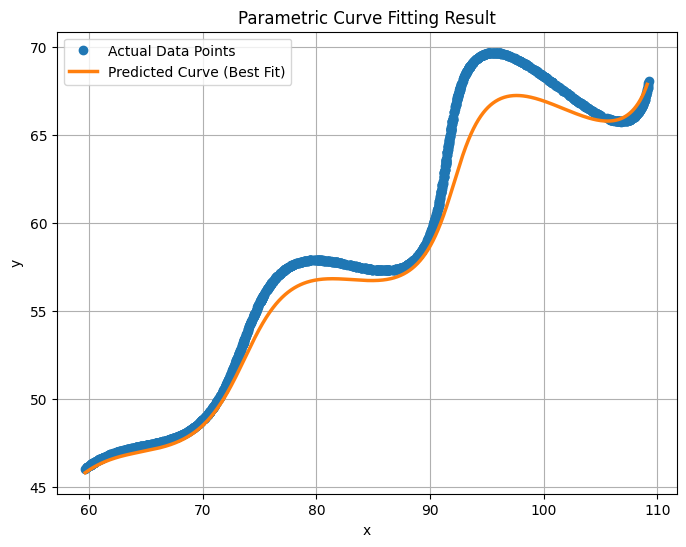


Final Parametric Equation (LaTeX format):
\left(t\cos(0.491) - e^{0.021389|t|}\sin(0.3t)\sin(0.491) + 54.9009, 42 + t\sin(0.491) + e^{0.021389|t|}\sin(0.3t)\cos(0.491)\right)


In [ ]:
# Assignment for Research and Development / AI
# Parameter Estimation for Parametric Curve

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("xy_data.csv")
x_data = data['x'].values
y_data = data['y'].values
t = np.linspace(6, 60, len(data))

# Parametric equations
def parametric_curve(params, t):
    theta, M, X = params
    x_pred = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y_pred = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x_pred, y_pred

# Loss function (L1 distance)
def loss(params):
    x_pred, y_pred = parametric_curve(params, t)
    return np.sum(np.abs(x_pred - x_data) + np.abs(y_pred - y_data))

# Initial guesses and parameter bounds
initial_guess = [np.deg2rad(20), 0.01, 10]
bounds = [(np.deg2rad(0), np.deg2rad(50)), (-0.05, 0.05), (0, 100)]

# Optimization
result = minimize(loss, initial_guess, bounds=bounds, method='L-BFGS-B')
theta_opt, M_opt, X_opt = result.x
theta_deg = np.rad2deg(theta_opt)

# Display optimized parameters
print(f"Theta (radians): {theta_opt:.4f}")
print(f"Theta (degrees): {theta_deg:.4f}")
print(f"M: {M_opt:.6f}")
print(f"X: {X_opt:.4f}")

# Generate predictions
x_pred, y_pred = parametric_curve(result.x, t)

# Plot actual vs predicted curve
plt.figure(figsize=(8,6))
plt.plot(x_data, y_data, 'o', label='Actual Data Points')
plt.plot(x_pred, y_pred, '-', linewidth=2.5, label='Predicted Curve (Best Fit)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parametric Curve Fitting Result')
plt.legend()
plt.grid(True)
plt.show()
